In [1]:
# This script compares performance against the market index. 
# Updated by: Kuo L. 2022-05-02

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Using pands-datareader module to connect to  yahoo finance api 
# to get close price for each ticker stock/ETF.
# for Market Index: NASDAQ Composite (^IXIC), 
#                   S&P 500 (^GSPC), 
#                   Dow Jones Industrial Average (^DJI)
#                   Russell 2000 (^RUT)

market_inx = '^GSPC' # ^GSPC for S&P 500
assets = [market_inx, 'AAPL','AMZN','GOOGL', 'PYPL']
start_date = '2020-1-1'
pf_data = pd.DataFrame()

for a in assets:
    #you can chagne the start date to any date in 'yyyy-mm-dd' format.
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = start_date)['Adj Close'] 

In [3]:
pf_data.head() #makre sure companies were public at starting date

,^GSPC,AAPL,AMZN,GOOGL,PYPL
Date,,,,,
2020-01-02,3257.850098,73.785919,1898.010010,1368.680054,110.750000
2020-01-03,3234.850098,73.068565,1874.969971,1361.520020,108.760002
2020-01-06,3246.280029,73.650795,1902.880005,1397.810059,110.169998
2020-01-07,3237.179932,73.304413,1906.859985,1395.109985,109.669998
2020-01-08,3253.050049,74.483612,1891.969971,1405.040039,111.820000


In [4]:
pf_data.tail() #check companies still open and public at ending date

,^GSPC,AAPL,AMZN,GOOGL,PYPL
Date,,,,,
2022-05-10,4001.050049,154.509995,2177.179932,2287.899902,78.750000
2022-05-11,3935.179932,146.500000,2107.439941,2272.050049,75.169998
2022-05-12,3930.080078,142.559998,2138.610107,2256.879883,74.290001
2022-05-13,4023.889893,147.110001,2261.100098,2321.010010,78.830002
2022-05-16,4008.010010,145.539993,2216.209961,2288.899902,77.650002


<AxesSubplot:xlabel='Date'>

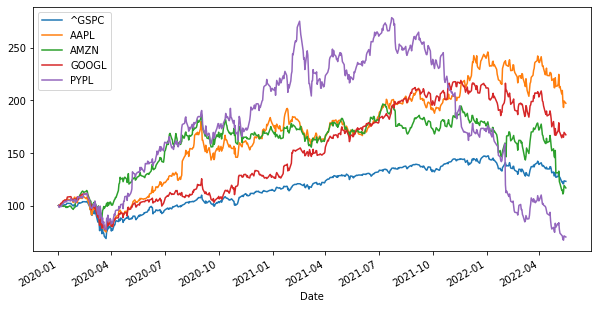

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5)) #Plot of company performance without considering dividends

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1)) #get average daily log returns

In [7]:
log_returns.mean() * 250 #get yearly returns(daily return x # of days a year). Market open roughly 250 days a year, so I do not use 365. 

^GSPC    0.086779
AAPL     0.284457
AMZN     0.064905
GOOGL    0.215337
PYPL    -0.148687
dtype: float64

In [8]:
log_returns.cov() * 250 #get coveriance between each pair.

,^GSPC,AAPL,AMZN,GOOGL,PYPL
^GSPC,0.066284,0.076973,0.057271,0.068934,0.084823
AAPL,0.076973,0.135684,0.086758,0.086622,0.114659
AMZN,0.057271,0.086758,0.131361,0.076993,0.103161
GOOGL,0.068934,0.086622,0.076993,0.108192,0.093860
PYPL,0.084823,0.114659,0.103161,0.093860,0.255794


In [9]:
log_returns.corr() #get correlation between each pair.

,^GSPC,AAPL,AMZN,GOOGL,PYPL
^GSPC,1.000000,0.811652,0.613760,0.814012,0.651427
AAPL,0.811652,1.000000,0.649847,0.714937,0.615456
AMZN,0.613760,0.649847,1.000000,0.645835,0.562779
GOOGL,0.814012,0.714937,0.645835,1.000000,0.564208
PYPL,0.651427,0.615456,0.562779,0.564208,1.000000


***